# A/B Testing Simulation for Policy Adoption
This notebook simulates a decision-making scenario using A/B testing to evaluate the effect of informational treatments on adoption behavior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 1000
# Control group (A): 30% adoption
group_a = np.random.binomial(1, 0.3, n)
# Treatment group (B): 45% adoption
group_b = np.random.binomial(1, 0.45, n)

# Create DataFrame
df = pd.DataFrame({
    'Group': ['A']*n + ['B']*n,
    'Adopted': np.concatenate([group_a, group_b])
})

In [2]:
# Summary statistics
summary = df.groupby('Group')['Adopted'].agg(['mean', 'sum', 'count']).reset_index()
summary

,Group,mean,sum,count
0,A,0.288,288,1000
1,B,0.470,470,1000


In [3]:
# Z-test
successes = [summary.loc[summary['Group'] == 'A', 'sum'].values[0],
             summary.loc[summary['Group'] == 'B', 'sum'].values[0]]
nobs = [n, n]
z_stat, p_value = proportions_ztest(successes, nobs)
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4e}")

Z-statistic: -8.3886, P-value: 4.9184e-17


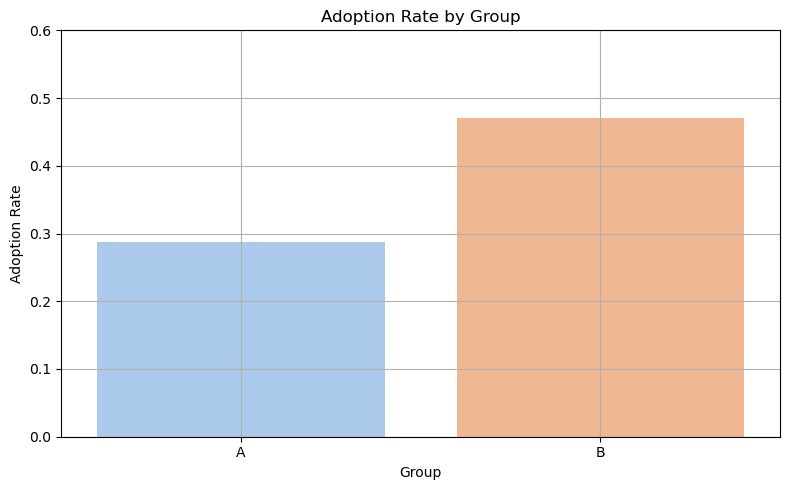

In [4]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x='Group', y='mean', palette='pastel')
plt.title('Adoption Rate by Group')
plt.ylabel('Adoption Rate')
plt.xlabel('Group')
plt.ylim(0, 0.6)
plt.grid(True)
plt.tight_layout()
plt.show()